<a href="https://colab.research.google.com/github/RNF24/Skin-Burn-Using-YOLOv5/blob/main/Skin_Burn_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Dependencies

In [2]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard fbe67e465375231474a2ad80a4389efc77ecff99

Cloning into 'yolov5'...
remote: Enumerating objects: 16111, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 16111 (delta 6), reused 9 (delta 1), pack-reused 16089
Receiving objects: 100% (16111/16111), 14.84 MiB | 17.60 MiB/s, done.
Resolving deltas: 100% (11025/11025), done.
/content/yolov5
HEAD is now at fbe67e4 Fix `OMP_NUM_THREADS=1` for macOS (#8624)


In [3]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.4 MB/s eta 0:00:00


#Download Dataset

In [6]:
!pip install -q roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="YOUR API KEY", model_format="yolov5", notebook="roboflow-yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.

In [7]:
%cd /content/yolov5
project = rf.workspace("aibuildersclub").project("skin-burns-4yoo2")
dataset = project.version(3).download("yolov5")

/content/yolov5
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Skin-Burns--3 in yolov5pytorch:: 100%|██████████| 9538/9538 [00:02<00:00, 4376.84it/s]


# Train Custom YOLOv5 Detector

In [ ]:
%%time
%cd /content/yolov5/
!python train.py --img 640 --batch 16 --epochs 100 --data /content/yolov5/Skin-Burns--3/data.yaml --weights yolov5n.pt --save-period 1

/content/yolov5
2023-12-19 11:28:18.948813: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 11:28:18.948867: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 11:28:18.950219: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 11:28:19.988173: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5n.pt, cfg=, data=/content/yolov5/Skin-Burns--3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False,

Note:
I saved my training in my google drive files to save since my GPU run time was running out. So please pardon me if the path is to content/drive/ since I have to mount my drive first ✌

# Evaluate Custom YOLOv5 Detector Performance

In [18]:
import pandas as pd

file_path = '/content/drive/MyDrive/Your_Folder/yolov5/runs/train/exp3/results.csv'

data = pd.read_csv(file_path)
data

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.039930,0.020868,0.024246,0.35605,0.68542,0.42129,0.23309,0.009573,0.005680,0.010246,0.070115,0.003321,0.003321
1,1,0.021850,0.012334,0.021709,0.43662,0.82465,0.59880,0.35618,0.016772,0.003621,0.009379,0.040049,0.006588,0.006588
2,2,0.018866,0.009890,0.020818,0.59891,0.77204,0.65600,0.57473,0.004912,0.002374,0.008407,0.009917,0.009789,0.009789
3,3,0.015045,0.008781,0.019922,0.48487,0.78370,0.67132,0.58191,0.006326,0.002089,0.009949,0.009703,0.009703,0.009703
4,4,0.012315,0.008025,0.020259,0.62039,0.84652,0.75459,0.68850,0.005195,0.001909,0.008663,0.009703,0.009703,0.009703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,93,0.002853,0.004006,0.014967,0.76995,0.79964,0.84837,0.83863,0.001717,0.002420,0.006934,0.000892,0.000892,0.000892
94,94,0.002674,0.004154,0.014077,0.77563,0.76967,0.83661,0.82828,0.001670,0.002416,0.007184,0.000793,0.000793,0.000793
95,95,0.002693,0.004052,0.014394,0.77308,0.78966,0.84394,0.83552,0.001583,0.002351,0.006739,0.000694,0.000694,0.000694
96,96,0.002518,0.004006,0.013631,0.76456,0.78853,0.83871,0.83002,0.001651,0.002339,0.006888,0.000595,0.000595,0.000595


from matplotlib import pyplot as plt
data['               epoch'].plot(kind='hist', bins=20, title='               epoch')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['      train/box_loss'].plot(kind='hist', bins=20, title='      train/box_loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['      train/obj_loss'].plot(kind='hist', bins=20, title='      train/obj_loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['      train/cls_loss'].plot(kind='hist', bins=20, title='      train/cls_loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='               epoch', y='      train/box_loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='      train/box_loss', y='      train/obj_loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='      train/obj_loss', y='      train/cls_loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='      train/cls_loss', y='   metrics/precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['               epoch']
  ys = series['      train/box_loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('               epoch', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('               epoch')
_ = plt.ylabel('      train/box_loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['               epoch']
  ys = series['      train/obj_loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('               epoch', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('               epoch')
_ = plt.ylabel('      train/obj_loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['               epoch']
  ys = series['      train/cls_loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('               epoch', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('               epoch')
_ = plt.ylabel('      train/cls_loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['               epoch']
  ys = series['   metrics/precision']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('               epoch', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('               epoch')
_ = plt.ylabel('   metrics/precision')

from matplotlib import pyplot as plt
data['               epoch'].plot(kind='line', figsize=(8, 4), title='               epoch')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['      train/box_loss'].plot(kind='line', figsize=(8, 4), title='      train/box_loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['      train/obj_loss'].plot(kind='line', figsize=(8, 4), title='      train/obj_loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['      train/cls_loss'].plot(kind='line', figsize=(8, 4), title='      train/cls_loss')
plt.gca().spines[['top', 'right']].set_visible(False)

### Visualize Data

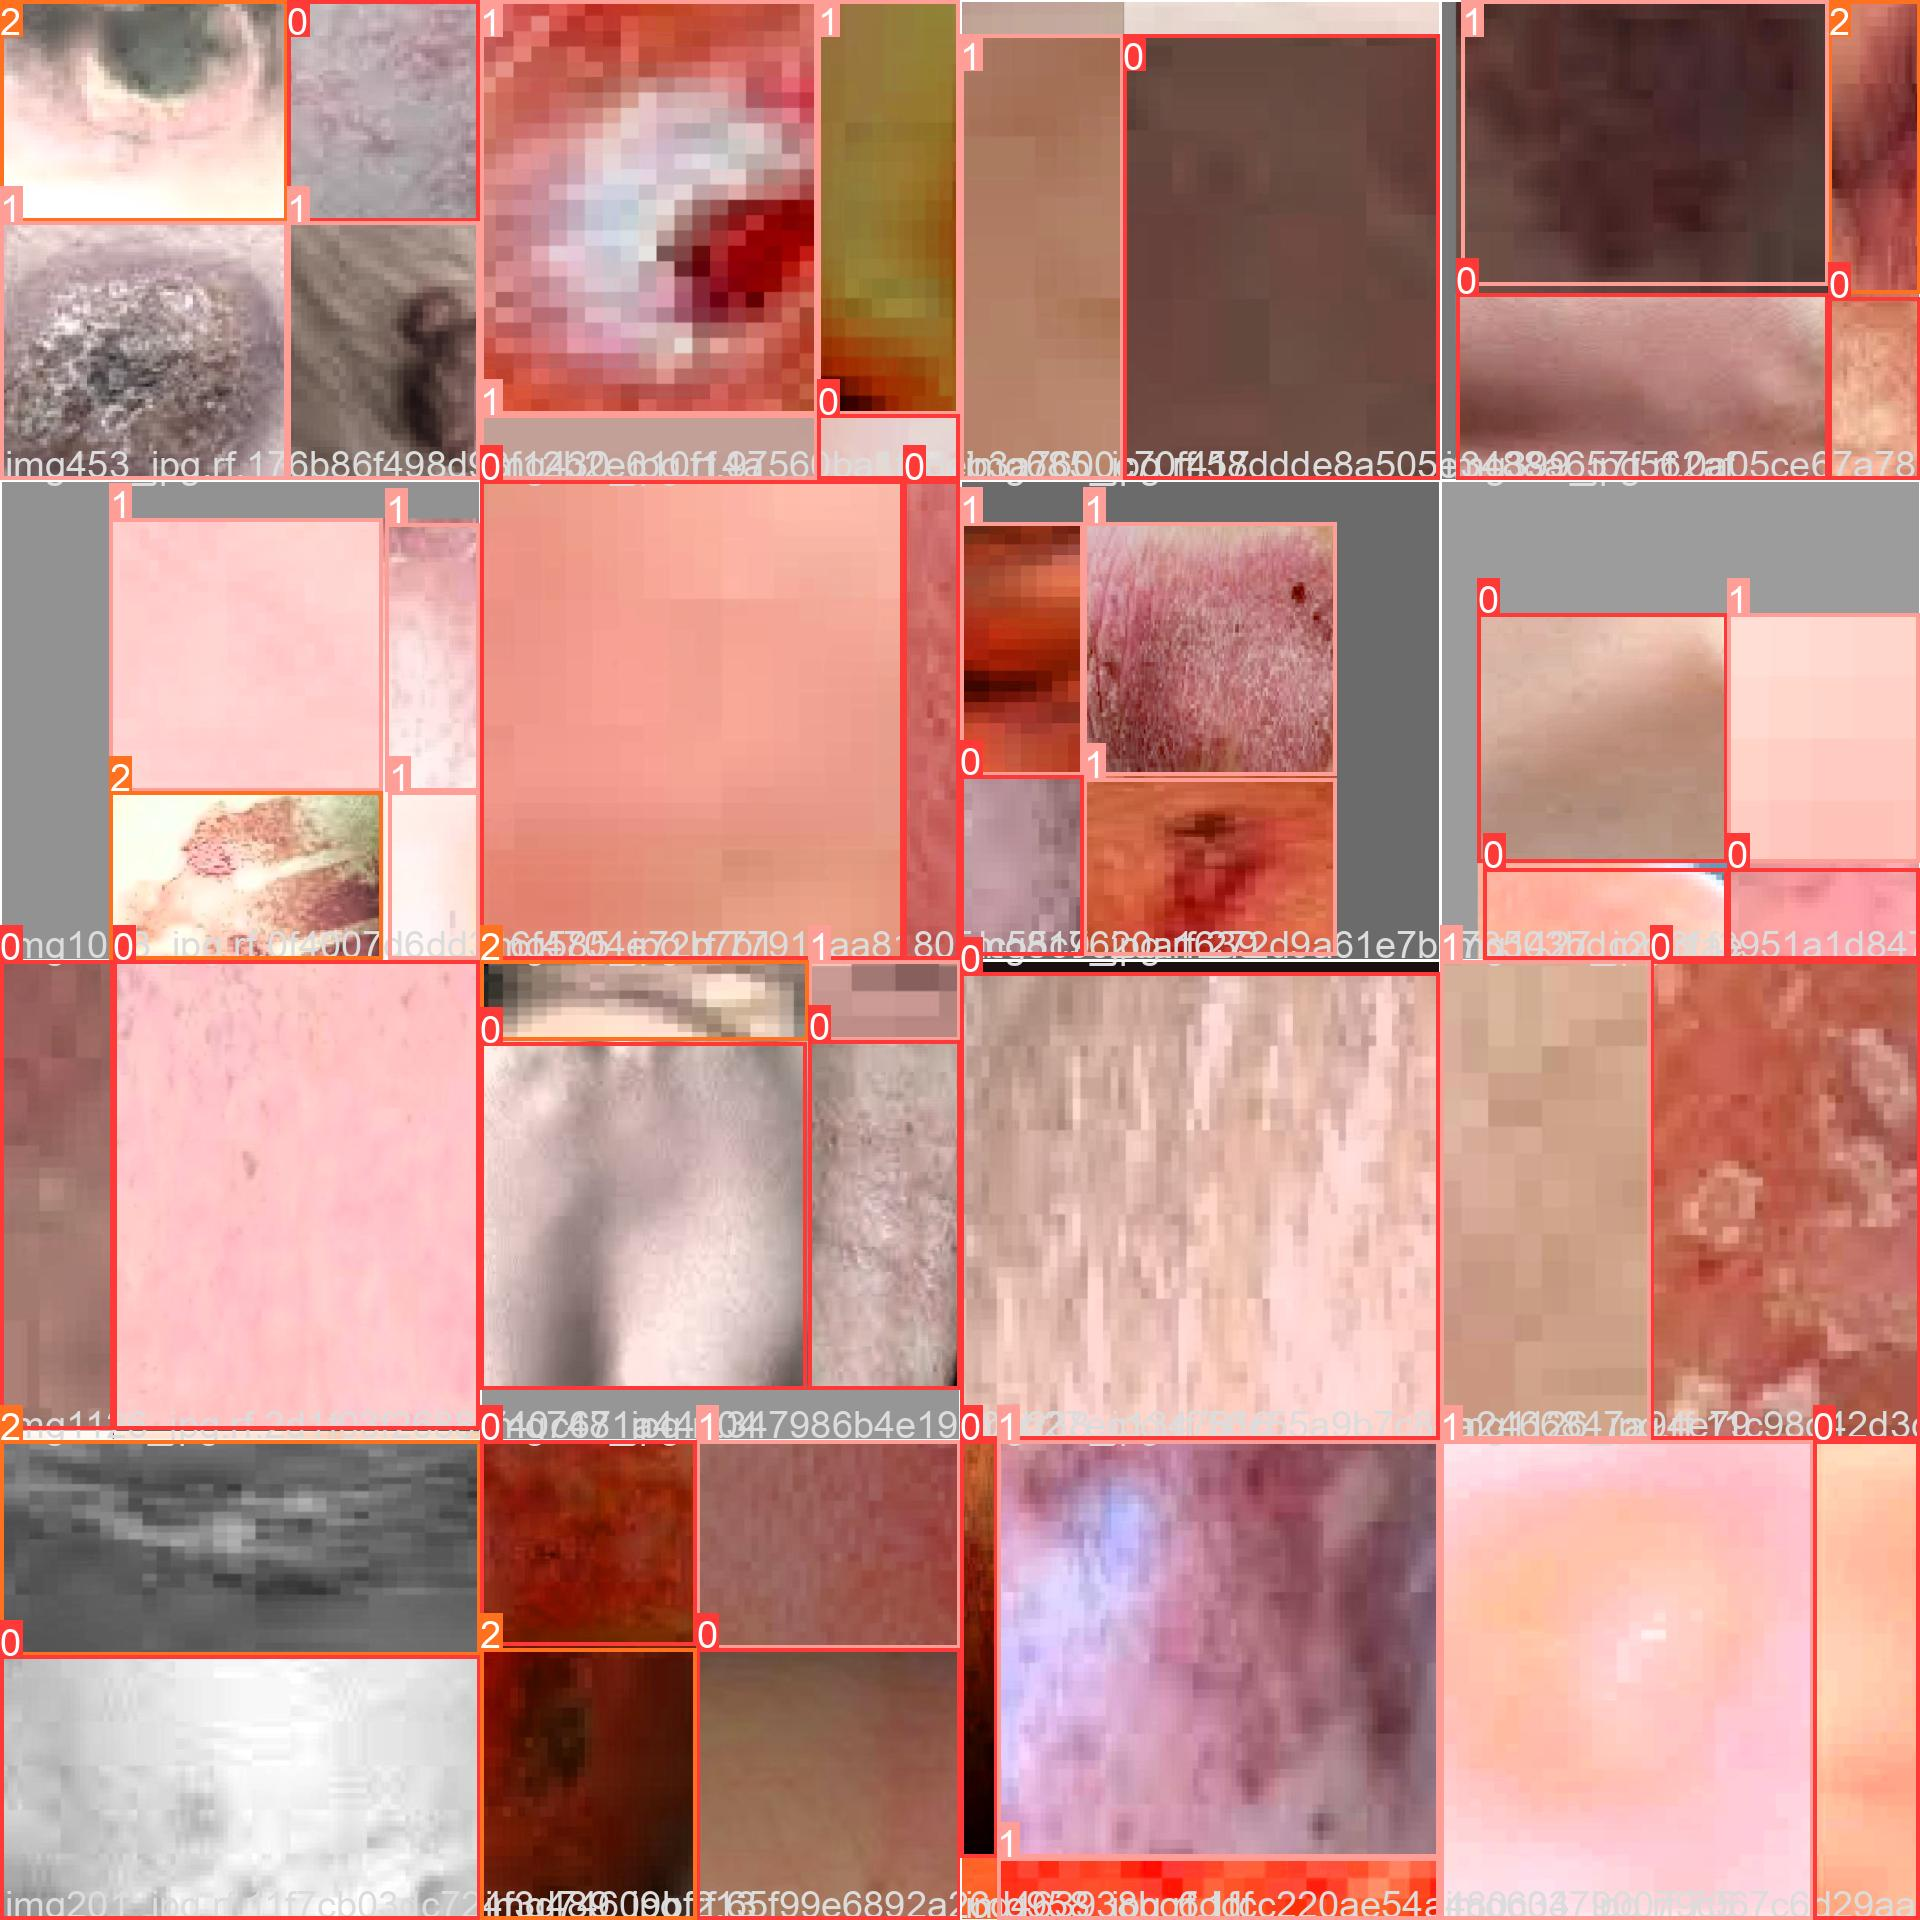

In [5]:
#Display the data
Image(filename='/content/drive/MyDrive/Your_Folder/yolov5/runs/train/exp3/train_batch0.jpg', width=900) #Change with your own Path

#Run Inference  With Trained Weights


In [ ]:
%cd /content/yolov5/
!python detect.py --weights "/content/drive/MyDrive/Your_Folder/yolov5/runs/train/exp3/weights/best.pt" --img 640 --conf 0.7 --source "/content/yolov5/Skin-Burns--3/test/images"

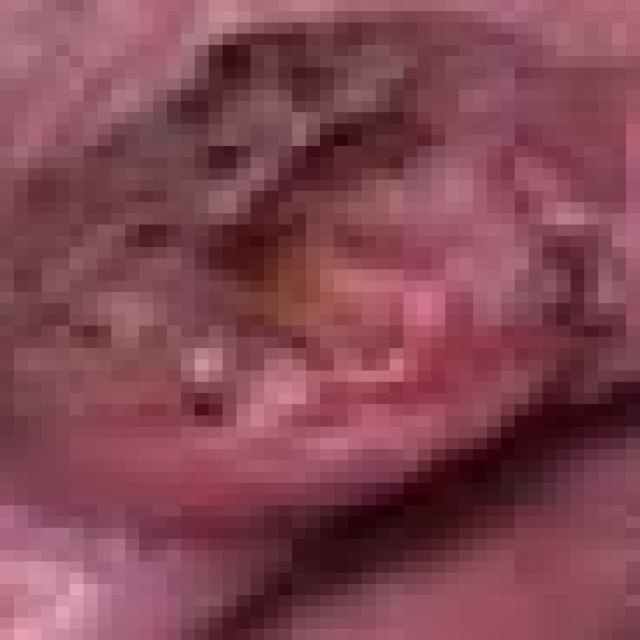

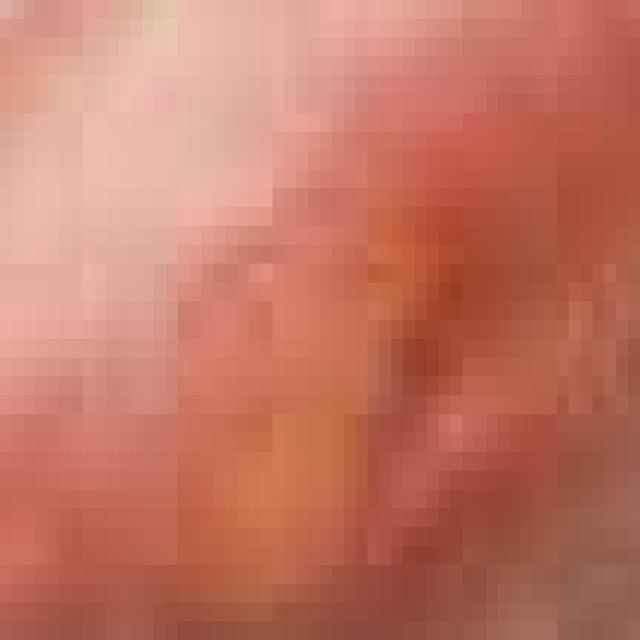

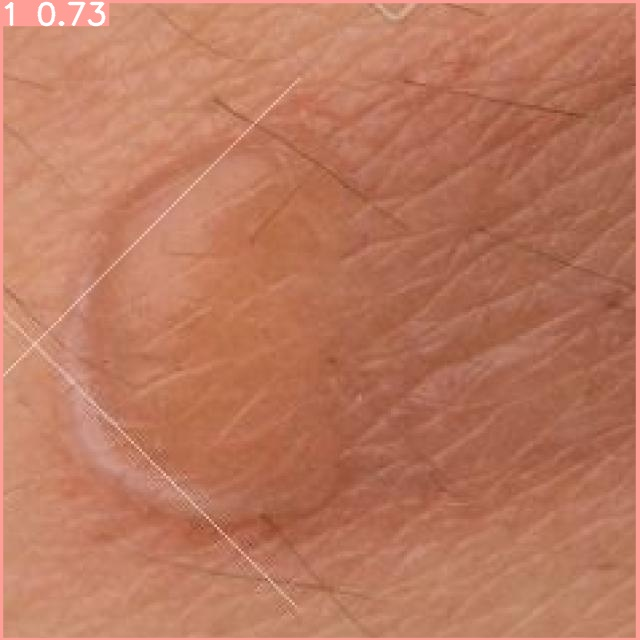

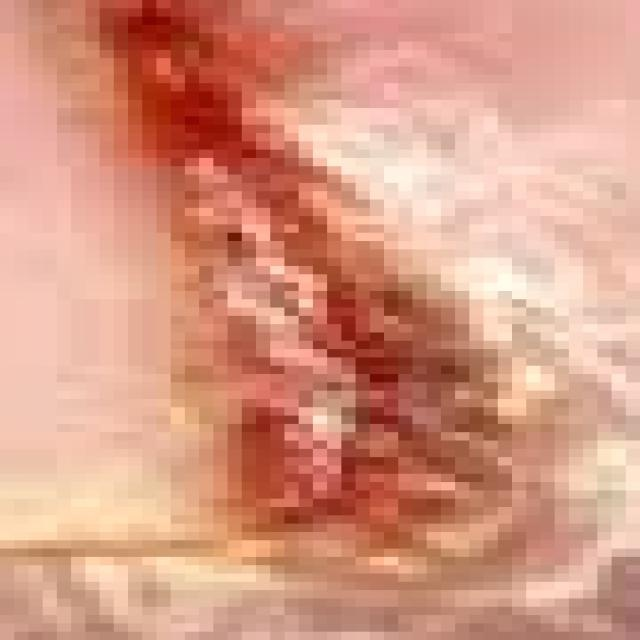

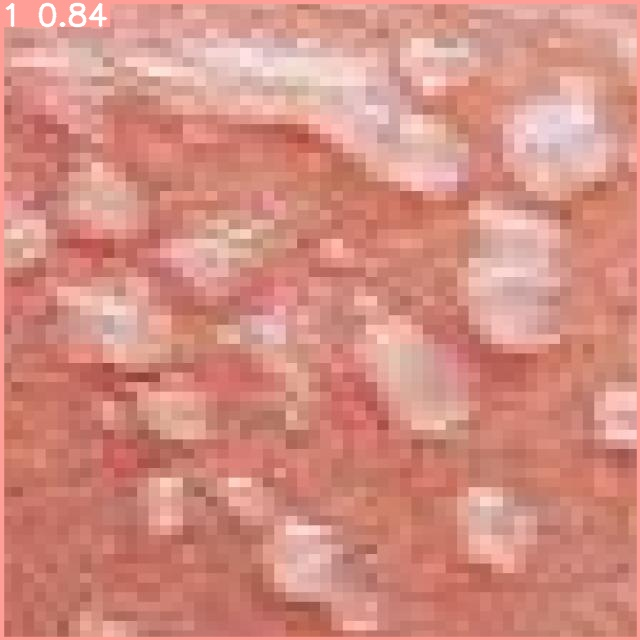

In [23]:
import glob
from IPython.display import Image, display

image_paths = glob.glob('/content/yolov5/runs/detect/exp4/*.jpg')

for imageName in image_paths[-5:]:
    display(Image(filename=imageName))
    print("\n")

#ZIP

In [ ]:
import zipfile
import os

def zip_folder(source_folder, output_path):
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(source_folder):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, source_folder)
                zipf.write(file_path, arcname)

source_folder = '/content/yolov5/runs/train/exp3'
output_path = '/content/YOLOv5N.zip'

zip_folder(source_folder, output_path)
print(f'Folder "{source_folder}" zipped to "{output_path}"')


Folder "/content/runs" zipped to "/content/YOLOv8N(Hasil model predict data testing).zip"


#Move folder

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Source and destination paths
source_path = "/content/yolov5/runs/train/exp3"
destination_path = "/content/drive/MyDrive/Your_Folder"

# Move the directory
shutil.move(source_path, destination_path)
